# Tweet sentement analysis

In [16]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jayan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [40]:
# Import libraries
import tweepy,re
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [41]:
# Twitter authentication tokens
consumerKey = ''
consumerSecret = ''
accessToken = ''
accessTokenSecret = ''
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [42]:
searchTerm = input("Enter Keyword/Tag to search about: ")
noOfTerms = int(input("Enter how many tweets to search: "))

tweets = []
tweetText = []

# Searching for tweets
tweets = tweepy.Cursor(api.search_tweets, q=searchTerm+" -filter:retweets", lang = "en").items(noOfTerms)

Enter Keyword/Tag to search about: FOMC
Enter how many tweets to search: 1000


In [43]:
# Convert tweets into dataframe
tweet_list = [tweet.text for tweet in tweets]
tweet_df = pd.DataFrame(tweet_list)
tweet_df

,0
0,US #payrolls: Average hourly earnings of all e...
1,@Tyrael_91 @tentei26 @trader1sz I don't see a ...
2,Federal Reserve Chairman Jerome Powell vowed t...
3,Wharton business school professor Jeremy Siege...
4,Next week:\n\nMacro🌎:🇩🇪 CPI &amp; unemployment...
...,...
995,The #crypto and traditional markets are both h...
996,@brunosmc1 @kylascan @conorsen Yeah - I think ...
997,Predicting bullish fed speech Friday or bearis...
998,"(03/10)Rest assured, the irrationality will re..."


In [44]:
# Clean data using regex
def clean_data(text):
    return ' '.join(re.sub("(@[a-zA-Z0-9]+)|([^0-9A-Za-z])|(https://[\w.]+/[\w]+)", " ", text).split())

tweet_df['cleaned_data'] = tweet_df[0].apply(clean_data)

In [45]:
tweet_df.head()

,0,cleaned_data
0,US #payrolls: Average hourly earnings of all e...,US payrolls Average hourly earnings of all emp...
1,@Tyrael_91 @tentei26 @trader1sz I don't see a ...,91 I don t see a case where anything rises any...
2,Federal Reserve Chairman Jerome Powell vowed t...,Federal Reserve Chairman Jerome Powell vowed t...
3,Wharton business school professor Jeremy Siege...,Wharton business school professor Jeremy Siege...
4,Next week:\n\nMacro🌎:🇩🇪 CPI &amp; unemployment...,Next week Macro CPI amp unemployment CPI unemp...


In [46]:
# Remove numbers
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(drop_numbers)

In [47]:
tweet_df.head()

,0,cleaned_data
0,US #payrolls: Average hourly earnings of all e...,US payrolls Average hourly earnings of all emp...
1,@Tyrael_91 @tentei26 @trader1sz I don't see a ...,I don t see a case where anything rises any t...
2,Federal Reserve Chairman Jerome Powell vowed t...,Federal Reserve Chairman Jerome Powell vowed t...
3,Wharton business school professor Jeremy Siege...,Wharton business school professor Jeremy Siege...
4,Next week:\n\nMacro🌎:🇩🇪 CPI &amp; unemployment...,Next week Macro CPI amp unemployment CPI unemp...


In [48]:
# Changing all texts to lowercase letters
def lowercase(text):
    text_words = word_tokenize(text)
    text_words_lower = [x.lower() for x in text_words]
    return ' '.join(text_words_lower)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(lowercase)

In [18]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jayan\AppData\Roaming\nltk_data...


True

In [20]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\jayan\AppData\Roaming\nltk_data...


True

In [49]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
def lemmatise(text):
    text_tokens = word_tokenize(text)
    text_lemm = [lemmatizer.lemmatize(word) for word in text_tokens]
    return ' '.join(text_lemm)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(lemmatise)

In [50]:
# Cleaned data
tweet_df['cleaned_data'].values

array(['u payroll average hourly earnings of all employee total private seasonally adjusted fed fomc economy',
       'i don t see a case where anything rise any time soon e gap down on monday then',
       'federal reserve chairman jerome powell vowed that they will keep raising interest rate until they re confident tha',
       'wharton business school professor jeremy siegel said that the u s federal reserve doe not need to hike more than',
       'next week macro cpi amp unemployment cpi unemployment amp ism speech fomc member mester amp williams',
       'wait what have you seen the previous fomc cpi print bulla went cray even when print wa at',
       'biro sure but why wa a month worth of gain wiped out seems a little extreme and why did we land',
       'the equity market rallied of perceived dovishness after the last fomc meeting every fed member',
       'they say money is not everything but everything need money in same way or another bfxc forextrader',
       'powell stated

In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jayan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [51]:
# Remove stopword
def remove_stopword(text):
    text_tokens = word_tokenize(text)
    tokens = [word for word in text_tokens if not word in set(stopwords.words('english'))]
    tokens_text = ' '.join(tokens)
    return tokens_text

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(remove_stopword)

In [52]:
tweet_df['cleaned_data'].values

array(['u payroll average hourly earnings employee total private seasonally adjusted fed fomc economy',
       'see case anything rise time soon e gap monday',
       'federal reserve chairman jerome powell vowed keep raising interest rate confident tha',
       'wharton business school professor jeremy siegel said u federal reserve doe need hike',
       'next week macro cpi amp unemployment cpi unemployment amp ism speech fomc member mester amp williams',
       'wait seen previous fomc cpi print bulla went cray even print wa',
       'biro sure wa month worth gain wiped seems little extreme land',
       'equity market rallied perceived dovishness last fomc meeting every fed member',
       'say money everything everything need money way another bfxc forextrader',
       'powell stated current u federal fund rate place stop pause raising rate',
       'fomc september bps start next big second bear market wave bounce k imo',
       'need bring back sminem stand chance otherwise bitco

In [53]:
# Lets calculate the Polarity of the Reviews
def get_polarity(text):
    textblob = TextBlob(str(text))
    pol = textblob.sentiment.polarity
    
    if(pol==0):
        return "Neutral"
    elif(pol>0 and pol<=0.3):
        return "Weakly Positive"
    elif(pol>0.3 and pol<=0.6):
        return "Positive"
    elif(pol>0.6 and pol<=1):
        return "Strongly Positive"
    elif(pol>-0.3 and pol<=0):
        return "Weakly Negative"
    elif(pol>-0.6 and pol<=-0.3):
        return "Negative"
    elif(pol>-1 and pol<=-0.6):
        return "Strongly Negative"
    
tweet_df['polarity'] = tweet_df['cleaned_data'].apply(get_polarity)

In [54]:
tweet_df['polarity'].value_counts()

Neutral              486
Weakly Positive      233
Weakly Negative      125
Positive              74
Negative              43
Strongly Positive     27
Strongly Negative     10
Name: polarity, dtype: int64

In [55]:
tweet_df.dtypes

0               object
cleaned_data    object
polarity        object
dtype: object

In [56]:
neutral = 0
wpositive = 0
spositive = 0
positive = 0
negative = 0
wnegative = 0
snegative = 0
polarity = 0

for i in range(0,70):
    textblob = TextBlob(str(tweet_df['cleaned_data'][i]))
    polarity+= textblob.sentiment.polarity
    pol = textblob.sentiment.polarity
    
    if (pol == 0):
        neutral += 1
    elif (pol > 0 and pol <= 0.3):
        wpositive += 1
    elif (pol > 0.3 and pol <= 0.6):
        positive += 1
    elif (pol > 0.6 and pol <= 1):
        spositive += 1
    elif (pol > -0.3 and pol <= 0):
        wnegative += 1
    elif (pol > -0.6 and pol <= -0.3):
        negative += 1
    elif (pol > -1 and pol <= -0.6):
        snegative += 1


In [57]:
# Finding average reaction
polarity = polarity / noOfTerms
polarity

0.003456398809523809

In [58]:
def percentage(part, whole):
    temp = 100 * float(part) / float(whole)
    return format(temp, '.2f')

In [59]:
# Finding average of how people are reacting
positive = percentage(positive, noOfTerms)
wpositive = percentage(wpositive, noOfTerms)
spositive = percentage(spositive, noOfTerms)
negative = percentage(negative, noOfTerms)
wnegative = percentage(wnegative, noOfTerms)
snegative = percentage(snegative, noOfTerms)
neutral = percentage(neutral, noOfTerms)

In [60]:
 # Pinting out data
print("How people are reacting on " + searchTerm + " by analyzing " + str(noOfTerms)  + "tweets.")
print()
print("-----------------------------------------------------------------------------------------")
print()
print("General Report: ")

if (polarity == 0):
    print("Neutral")
elif (polarity > 0 and polarity <= 0.3):
    print("Weakly Positive")
elif (polarity > 0.3 and polarity <= 0.6):
    print("Positive")
elif (polarity > 0.6 and polarity <= 1):
    print("Strongly Positive")
elif (polarity > -0.3 and polarity <= 0):
    print("Weakly Negative")
elif (polarity > -0.6 and polarity <= -0.3):
    print("Negative")
elif (polarity > -1 and polarity <= -0.6):
    print("Strongly Negative")

print()
print("------------------------------------------------------------------------------------------")
print()
print("Detailed Report: ")
print(str(positive) + "% people thought it was positive")
print(str(wpositive) + "% people thought it was weakly positive")
print(str(spositive) + "% people thought it was strongly positive")
print(str(negative) + "% people thought it was negative")
print(str(wnegative) + "% people thought it was weakly negative")
print(str(snegative) + "% people thought it was strongly negative")
print(str(neutral) + "% people thought it was neutral")

How people are reacting on FOMC by analyzing 1000tweets.

-----------------------------------------------------------------------------------------

General Report: 
Weakly Positive

------------------------------------------------------------------------------------------

Detailed Report: 
0.40% people thought it was positive
1.30% people thought it was weakly positive
0.20% people thought it was strongly positive
0.10% people thought it was negative
0.70% people thought it was weakly negative
0.00% people thought it was strongly negative
4.30% people thought it was neutral


In [61]:
sizes = [positive, wpositive, spositive, neutral, negative, wnegative, snegative]
colors = ['yellowgreen','lightgreen','darkgreen', 'gold', 'red','lightsalmon','darkred']
labels = ['Positive [' + str(positive) + '%]', 'Weakly Positive [' + str(wpositive) + '%]',
          'Strongly Positive [' + str(spositive) + '%]', 'Neutral [' + str(neutral) + '%]',
          'Negative [' + str(negative) + '%]', 'Weakly Negative [' + str(wnegative) + '%]', 
          'Strongly Negative [' + str(snegative) + '%]']

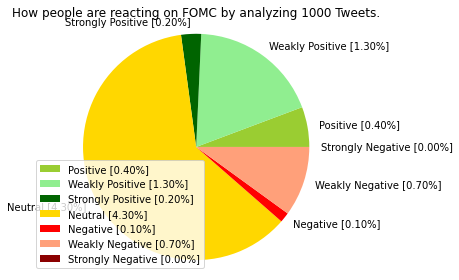

In [62]:
# Plot the data for visualization
plt.pie(sizes, labels = labels, colors = colors)
plt.legend(labels, loc="best")
plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(noOfTerms) + ' Tweets.')
plt.axis('equal')
plt.tight_layout()
plt.show()